In [1]:
from numpy import random
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("boston_ny_seattle_denver_airbnb.csv", sep=',',low_memory=False )

In [3]:
low_information_cols = [] 

#цикл по всем столбцам
for col in data.columns:
    #наибольшая относительная частота в признаке
    top_freq = data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = data[col].nunique() / data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')    

Unnamed: 0: 100.0% уникальных значений
id: 100.0% уникальных значений
listing_url: 100.0% уникальных значений
name: 98.18% уникальных значений
summary: 96.22% уникальных значений
space: 96.3% уникальных значений
description: 98.3% уникальных значений
experiences_offered: 100.0% одинаковых значений
thumbnail_url: 99.98% уникальных значений
medium_url: 99.98% уникальных значений
picture_url: 99.81% уникальных значений
xl_picture_url: 99.98% уникальных значений
host_has_profile_pic: 99.74% одинаковых значений
country_code: 100.0% одинаковых значений
country: 100.0% одинаковых значений
latitude: 98.08% уникальных значений
longitude: 98.64% уникальных значений
bed_type: 97.25% одинаковых значений
has_availability: 100.0% одинаковых значений
require_guest_profile_picture: 96.85% одинаковых значений
require_guest_phone_verification: 96.14% одинаковых значений
calculated_host_listings_count_shared_rooms: 97.9% одинаковых значений


In [4]:
cols_null_percent = data.isna().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
print('Нулевые значения')
cols_with_null.head(50)

Нулевые значения


square_feet                                     98.722276
license                                         94.742423
calculated_host_listings_count_shared_rooms     91.402315
calculated_host_listings_count_private_rooms    91.402315
number_of_reviews_ltm                           91.402315
maximum_nights_avg_ntm                          91.402315
minimum_nights_avg_ntm                          91.402315
maximum_maximum_nights                          91.402315
minimum_maximum_nights                          91.402315
maximum_minimum_nights                          91.402315
minimum_minimum_nights                          91.402315
calculated_host_listings_count_entire_homes     91.402315
host_acceptance_rate                            89.115490
jurisdiction_names                              84.644340
monthly_price                                   83.030839
weekly_price                                    79.264823
notes                                           59.351418
interaction   

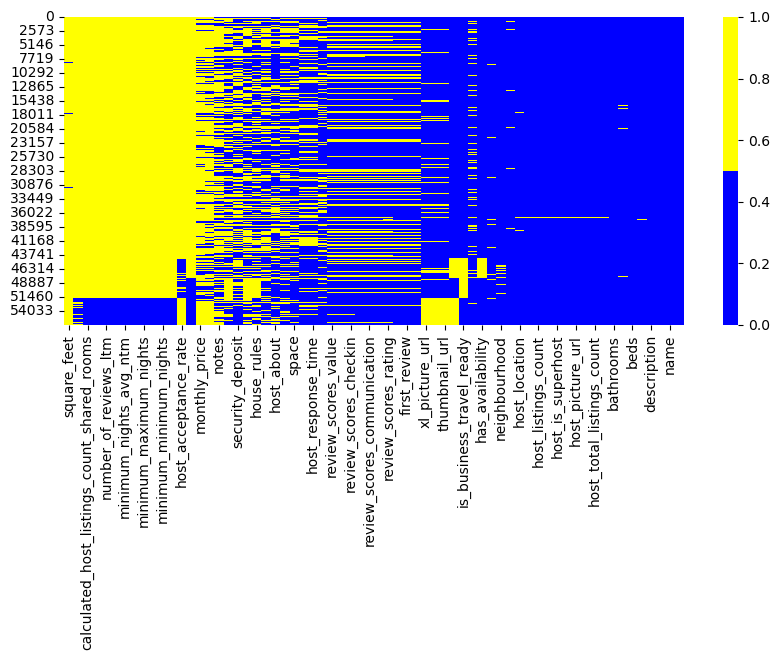

In [5]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    data[cols].isnull(),
    cmap=sns.color_palette(colors),
)